### Нормальное распределение

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
%matplotlib inline

Сгенерируем выборку из нормально распределённой случайной величины.

In [5]:
mu = 2.0
sigma = 0.5

norm_rv = sts.norm(loc=mu, scale=sigma)
norm_rv.rvs(size=10)

array([1.30079845, 1.20278205, 1.86445339, 2.32287651, 1.40549664,
       3.41720709, 2.3820413 , 1.8480021 , 1.14787491, 2.33938968])

С помощью str.norm задаем нормально распределенную случайную величину.
Аргумент loc задает μ, scale - среднеквадратичное отнокление σ, size - размер выборки.

Если вызывается rvs, то size можно не писать.

Функция cdf возаращает значение функции распределения нормальной величины в точке, соответствующей ее аргументу.

In [13]:
norm_rv.cdf(3)

0.9772498680518208

График функции распределения.

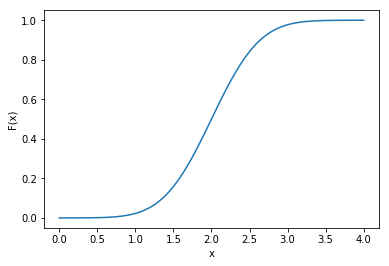

In [16]:
x = np.linspace(0, 4, 100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

In [14]:
norm_rv.pdf(3)

0.10798193302637613

С помощью pdf можно вычислить значение функции плотности вероятности нормального распределения в заданной точке.

График функции плотности вероятности.

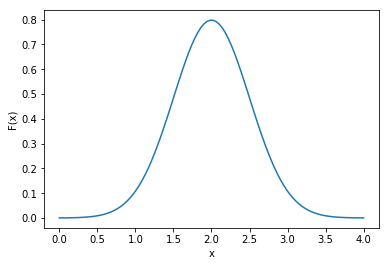

In [18]:
x = np.linspace(0, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

### Равномерное распределение на отрезке

Сгенерируем выборку из случайной величины, имеющей равномерное распределение на отрезке  [a, b]:

In [19]:
a = 1
b = 4

uniform_rv = sts.uniform(a, b-a)
uniform_rv.rvs(10)

array([1.54052351, 3.89096321, 3.635919  , 2.38178323, 3.7306735 ,
       2.3253749 , 3.19713218, 1.1023904 , 2.19060821, 2.05506296])

В функции sts первый аргумент это левая граница, а второй аргумент масштаб.

График функции распределения.

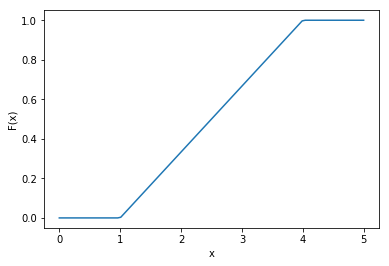

In [20]:
x = np.linspace(0, 5, 100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

График функции плотности вероятности.

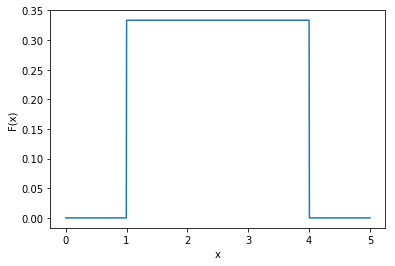

In [21]:
x = np.linspace(0, 5, 1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

### Распределение Бернулли

In [22]:
bernoulli = sts.bernoulli(0.7)

bernoulli.rvs(10)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

### Биноминальное распределение

Первый аргумент функции binom это значение параметра n, а второй значение параметра p.

In [31]:
binomial = sts.binom(20, 0.7)
binomial.rvs(10)

array([16, 11,  8, 13, 14, 14, 12, 14, 14, 14])

Функция распределения.

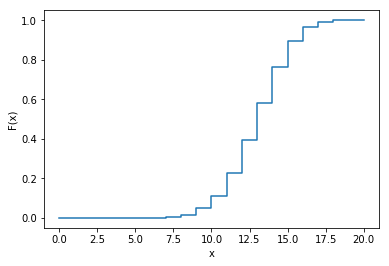

In [34]:
x = np.linspace(0, 20, 21)
cdf = binomial.cdf(x)
plt.step(x, cdf)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

Для дискретных случайных величин pmf заменяет функцию плотности pdf.

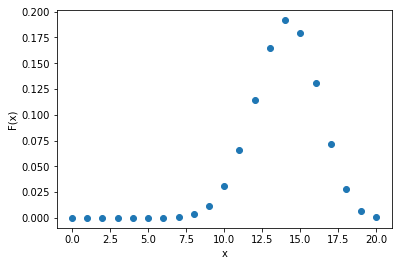

In [35]:
x = np.linspace(0, 20, 21)
pmf = binomial.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров.

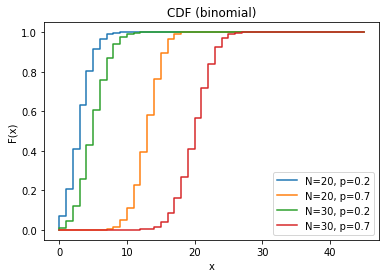

In [40]:
x = np.linspace(0, 45, 46)
for n in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(n, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label='N=%s, p=%s' % (n, p))

plt.legend()
plt.title('CDF (binomial)')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

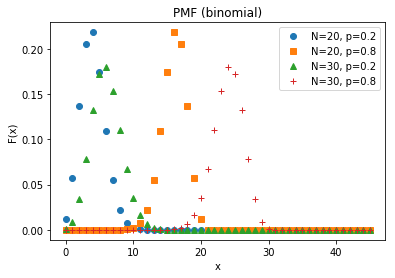

In [41]:
x = np.linspace(0, 45, 46)
symbols = iter(['o', 's', '^', '+'])
for n in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(n, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label='N=%s, p=%s' % (n, p))
        
plt.legend()
plt.title('PMF (binomial)')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

### Распределение Пуассона

In [42]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([6, 6, 8, 2, 8, 3, 6, 1, 5, 3])

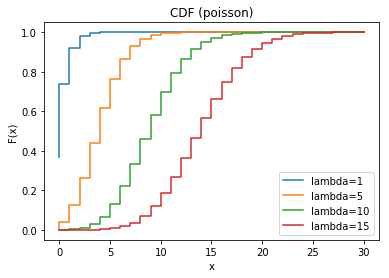

In [43]:
x = np.linspace(0, 30, 31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label='lambda=%s' % l)

plt.legend()
plt.title('CDF (poisson)')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

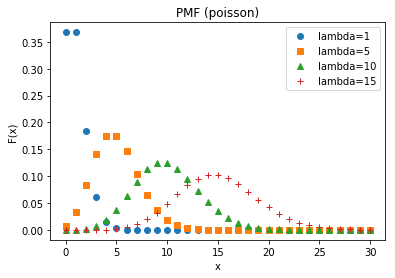

In [45]:
x = np.linspace(0, 30, 31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label='lambda=%s' % l)

plt.legend()
plt.title('PMF (poisson)')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

### Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей. Для этого используется функция numpy.random.choice.

In [47]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([12, 12, 12,  1,  5,  5, 12,  5,  5, 12])

### Другие распределения

Существует большое количество других стандартных семейств распределений. Их можно сгенерировать в Python. Например, распределение хи-квадрат, имеющее натуральный параметр k, который называется числом степеней свободы.

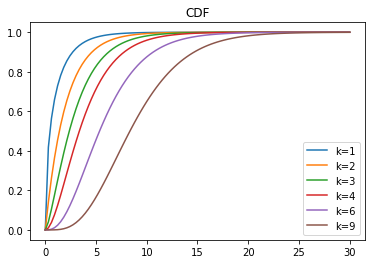

In [50]:
x = np.linspace(0, 30, 100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label='k=%s' % k)

plt.legend()
plt.title('CDF')
plt.show()

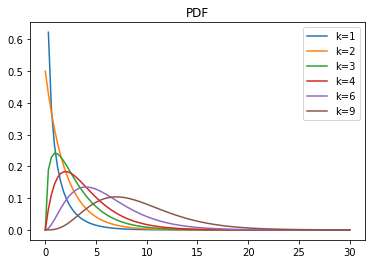

In [51]:
x = np.linspace(0, 30, 100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.pdf(x)
    plt.plot(x, cdf, label='k=%s' % k)

plt.legend()
plt.title('PDF')
plt.show()